# Mapas del Agua

## Leer datos

In [1]:
import mapper as Mapper
import mapper_addons as addon
import general_codes as gc
import matplotlib.pyplot as plt
import mapper_colors as mapcol
import os
import pandas as pd
import numpy as np

output_path = 'output_plots'
sonora = Mapper.new_map(region = 'sonora')
agua_sonora = sonora.copy()
template = addon.call_template('sonora', 'Prueba')
template_agua = template.copy()
template_name = 'Agua Hermosillo'

water_data = 'data\\agua'
water_years = os.listdir(water_data)

files = {}
paths = {}
for wy in water_years:
    p = os.path.join(water_data, wy)
    paths[wy] = p
    files[wy] = os.listdir(p)

wy = water_years[0]
g = files[wy]
f0 = os.path.join(paths[wy],g[0])

df = pd.read_csv(f0, index_col=0)
df.set_index(df.columns[0], drop=True, inplace=True)
agua_sonora = agua_sonora.join(df)

## Un mapa

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


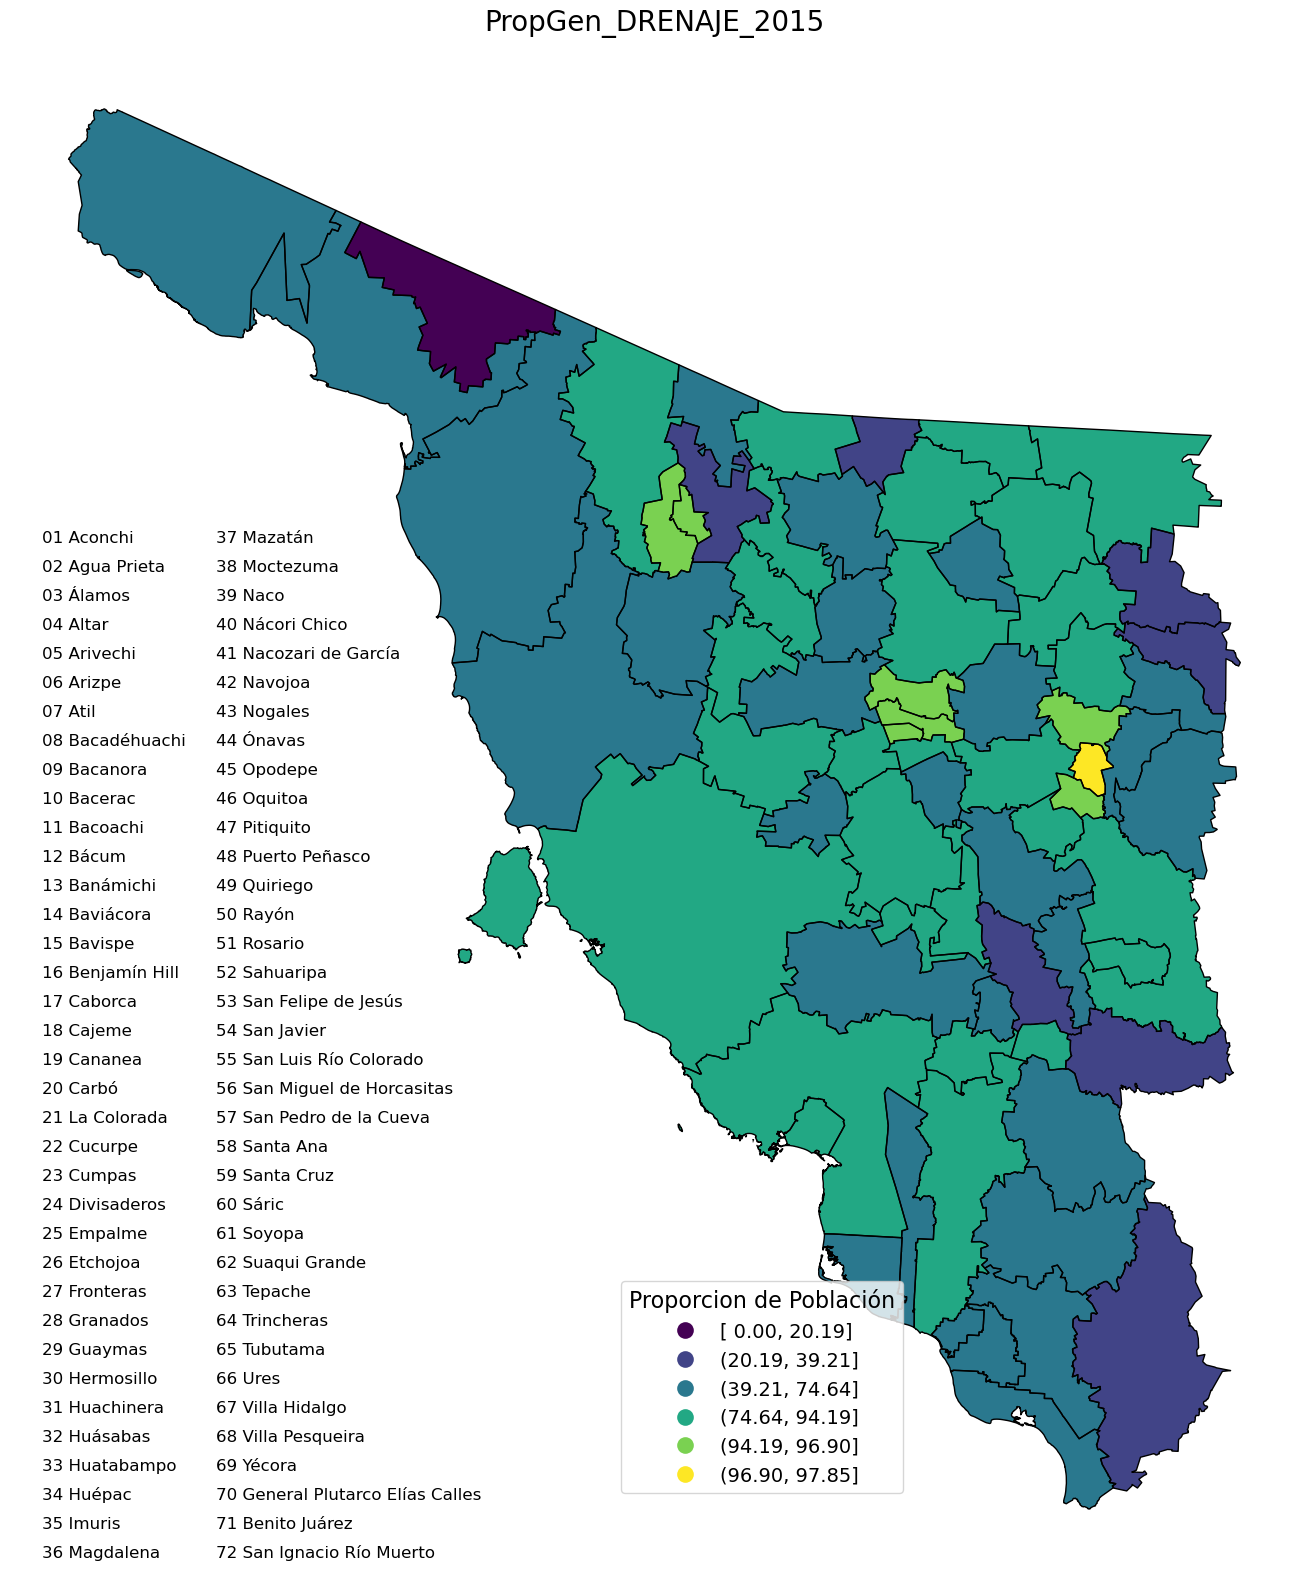

In [2]:

fig, ax = plt.subplots(figsize = (20,20))
agua_sonora.plot(column = '1', ax = ax, scheme = 'percentiles', legend=True, legend_kwds = {
    # 'loc' : 'lower left',
    'title': 'Proporcion de Población',
    'title_fontsize': 16,
    'bbox_to_anchor' : (0.7,0.2),
    'markerscale' : 1.2,
    'fontsize' : 14,
    'interval': True
})
ax.set_title(g[0][:-4], fontsize = 20)
agua_sonora.boundary.plot(color = 'black', lw = 1, ax = ax)
ax.set_axis_off()
mx = 1.25e6
my = 2.1e6
addon.print_regions(agua_sonora.index, [mx, my], ax)

# Todos los mapas.

In [3]:
def agua2():
    for wy in water_years:
        for f in files[wy]:
            agua_sonora = sonora.copy()
            f0 = os.path.join(paths[wy],f)
            df = pd.read_csv(f0, index_col=0)
            df.set_index(df.columns[0], drop=True, inplace=True)
            fig, ax = plt.subplots(figsize = (20,20))
            agua_sonora = agua_sonora.join(df)
            agua_data_plots = gc.set_data(agua_sonora)
            for n_a, adp in enumerate(agua_data_plots):
                agua_sonora.plot(adp, ax = ax, scheme = 'quantiles',k = 4, legend=True, legend_kwds = {
                    # 'loc' : 'lower left',
                    'title': 'Proporcion de Población',
                    'title_fontsize': 16,
                    'bbox_to_anchor' : (0.6,0.2),
                    'markerscale' : 1.2,
                    'fontsize' : 14,
                    'interval': True
                })
                ax.set_title(f[:-4], fontsize = 20)
                agua_sonora.boundary.plot(color = 'black', lw = 1, ax = ax)
                ax.set_axis_off()
                mun_x = 1.25e6
                mun_y = 2.1e6
                sep_x = 0.9e5
                sep_y = 0.15e5
                n_cols = 2
                block = len(agua_sonora.index) // n_cols 
                for k,mun in enumerate(agua_sonora.index):
                    cve = f'0{k+1}' if k+1<10 else f'{k+1}'
                    text = f'{cve} {mun}'
                    ax.annotate(text=text, xy = (mun_x, mun_y), xytext= (mun_x + k // block * sep_x ,mun_y - k % block *sep_y),
                                fontsize = 12)
                plt.savefig(f'output_plots\\agua\\{f[:-4]}_{n_a}.png')


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

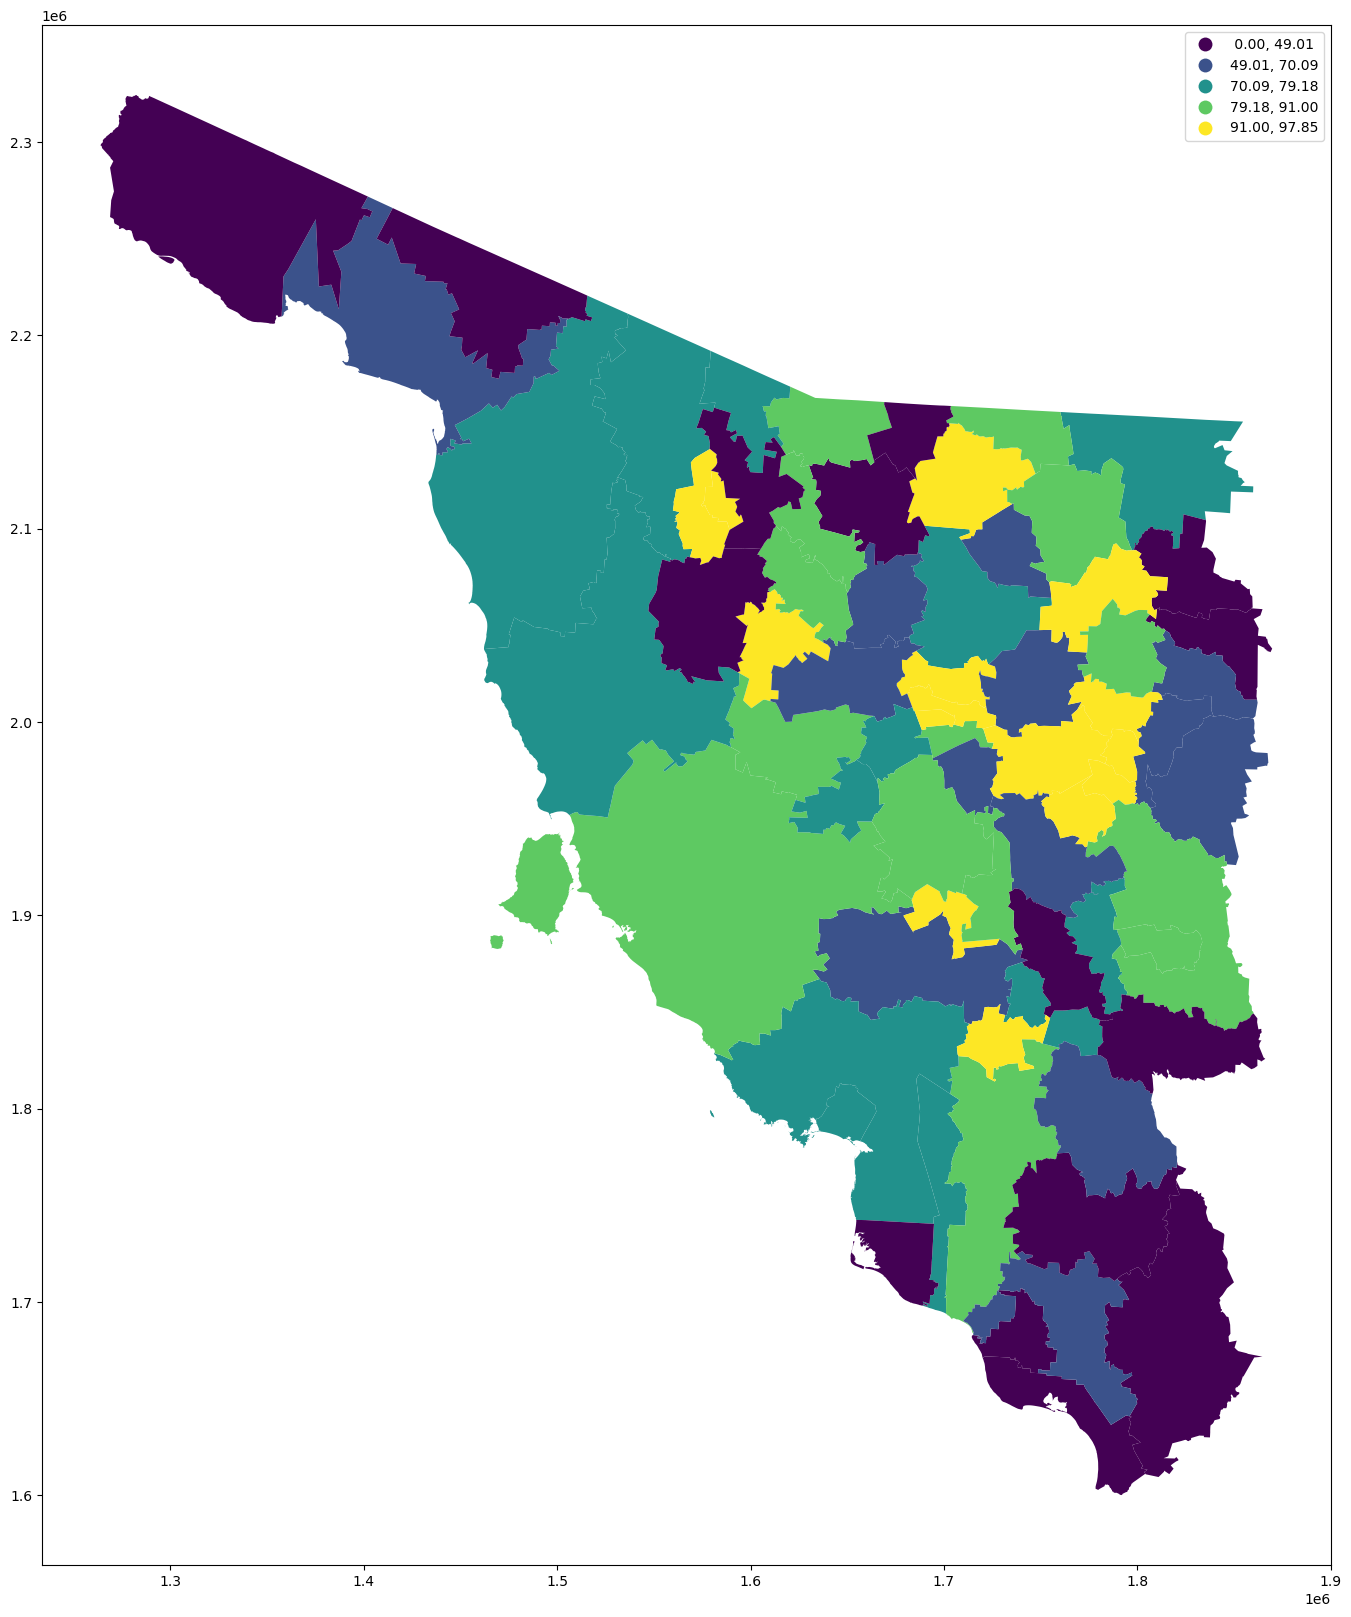

In [4]:
fis, axs = plt.subplots(figsize = (20,20))
agua_sonora.plot('1', scheme = 'quantiles', legend = True, ax =axs)

In [5]:
import mapclassify
mapclassify.Percentiles(agua_sonora['1'])
# q10 = mapclassify.Percentiles(agua_sonora.Indigena)

Percentiles

   Interval      Count
----------------------
[ 0.00, 20.19] |     1
(20.19, 39.21] |     7
(39.21, 74.64] |    28
(74.64, 94.19] |    28
(94.19, 96.90] |     7
(96.90, 97.85] |     1

In [6]:
def agua():
    for wy in water_years:
        for f in files[wy]:
            agua_sonora = sonora.copy()
            f0 = os.path.join(paths[wy],f)
            df = pd.read_csv(f0, index_col=0)
            df.set_index(df.columns[0], drop=True, inplace=True)
            fig, ax = plt.subplots(figsize = (20,20))
            agua_sonora = agua_sonora.join(df)
            agua_data_plots = gc.set_data(agua_sonora)
            for n_a, adp in enumerate(agua_data_plots):
                agua_sonora.plot(adp, ax = ax, scheme = 'quantiles', colormap = 'viridis',legend=True, legend_kwds = {
                    # 'loc' : 'lower left',
                    'title': 'Proporcion de Población',
                    'title_fontsize': 16,
                    'bbox_to_anchor' : (0.6,0.2),
                    'markerscale' : 1.2,
                    'fontsize' : 14,
                    'interval': True
                })
                ax.set_title(f[:-4], fontsize = 20)
                agua_sonora.boundary.plot(color = 'black', lw = 1, ax = ax)
                ax.set_axis_off()
                mun_x = 1.25e6
                mun_y = 2.1e6
                sep_x = 0.9e5
                sep_y = 0.15e5
                n_cols = 2
                block = len(agua_sonora.index) // n_cols 
                for k,mun in enumerate(agua_sonora.index):
                    cve = f'0{k+1}' if k+1<10 else f'{k+1}'
                    text = f'{cve} {mun}'
                    ax.annotate(text=text, xy = (mun_x, mun_y), xytext= (mun_x + k // block * sep_x ,mun_y - k % block *sep_y),
                                fontsize = 12)
                plt.savefig(f'output_plots\\agua\\{f[:-4]}_{n_a}.png')
        


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

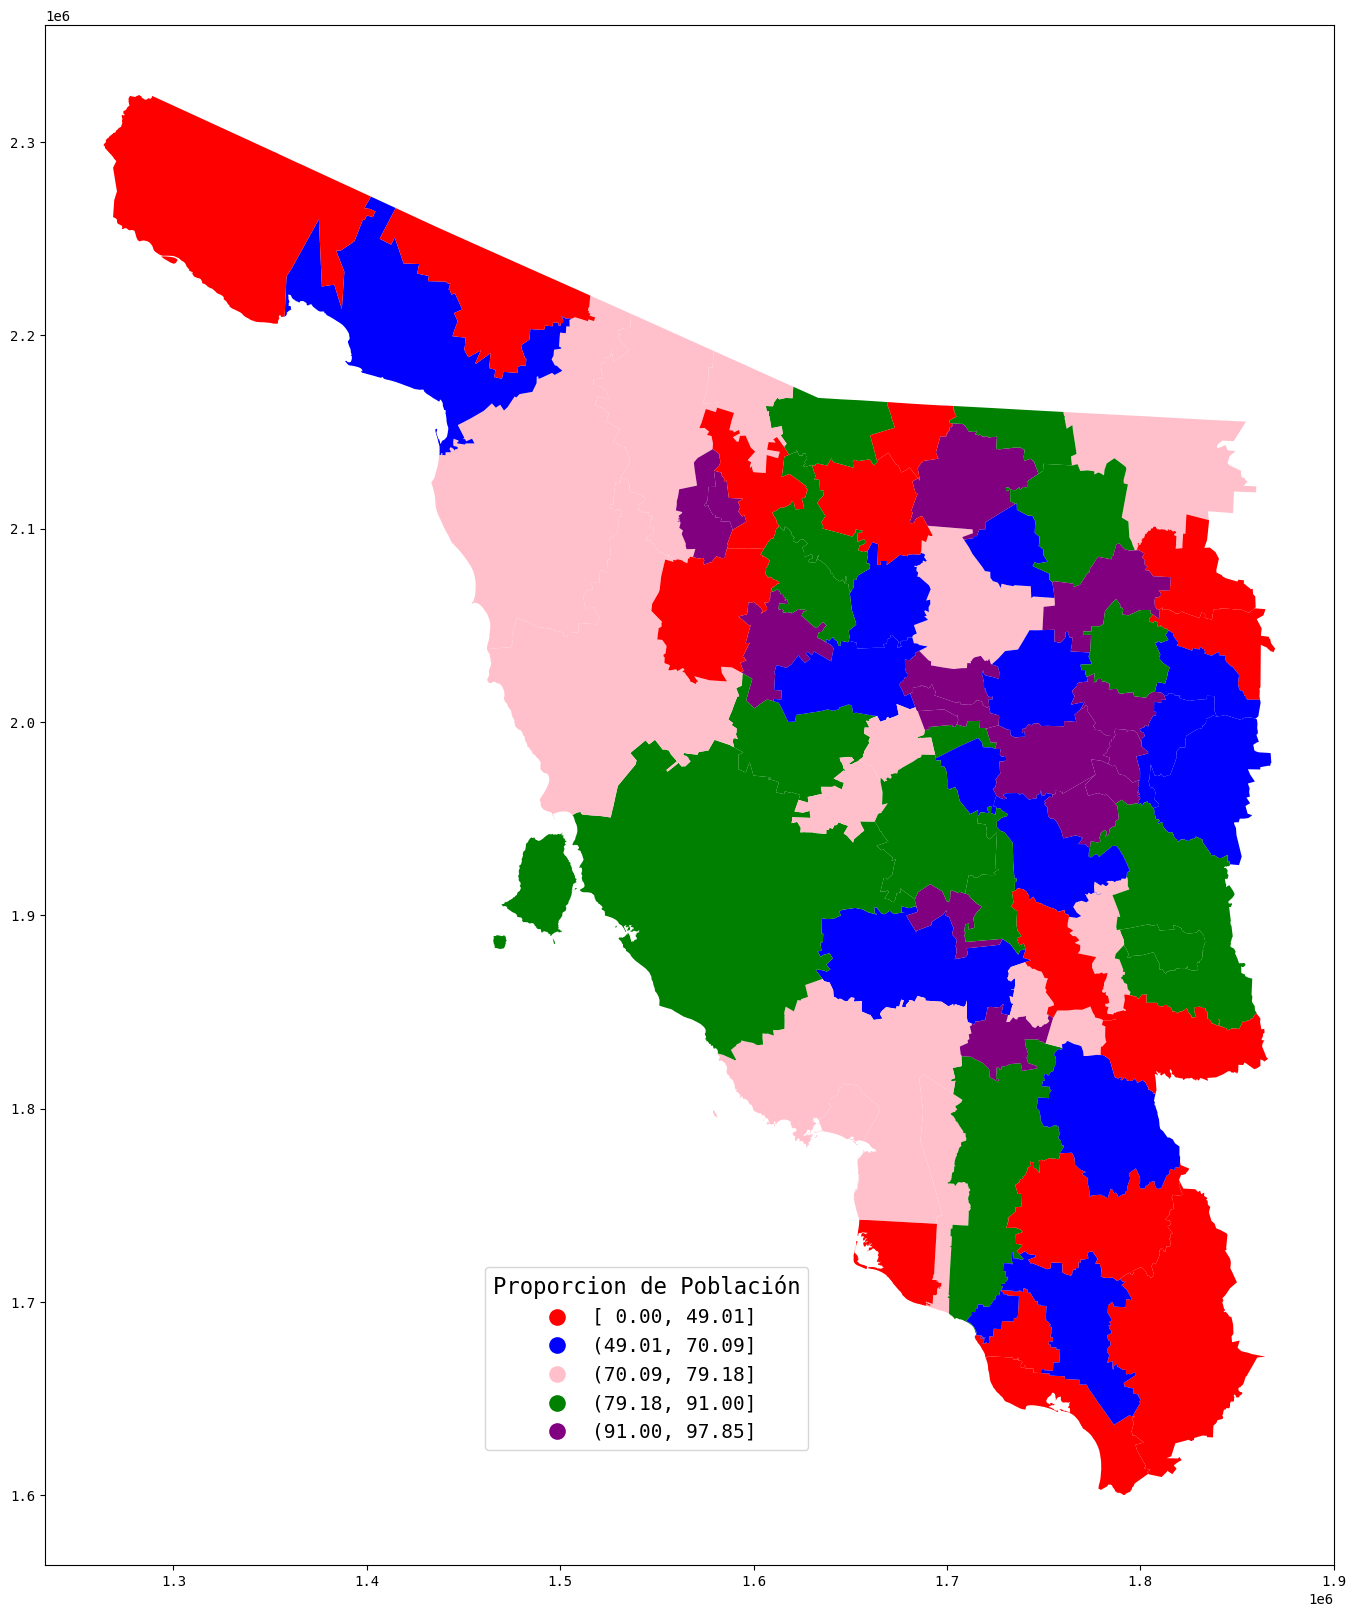

In [7]:
# chicago.plot(
#     column="POP2010",
#     legend=True,
#     scheme="quantiles",
#     figsize=(15, 10),
#     missing_kwds={
#         "color": "lightgrey",
#         "edgecolor": "red",
#         "hatch": "///",
#         "label": "Missing values",
#     },
# )
plt.rcParams["font.family"] = "monospace"


def code_to_template(mapa, col, template, ax, **kwargs):
    """
    """
    scheme = kwargs.get('scheme','percentiles')
    legend = kwargs.get('legend', [0])
    interval = addon.scheme_to_interval(mapa, col, scheme)

    
colors = {0:'red',
          1: 'blue',
          3: 'green',
          2: 'pink',
          4: 'purple'}

mplcol = mapcol.custom_cmap(colors)

collll ='1'
fis, axs = plt.subplots(figsize = (20,20))
agua_sonora.plot(collll, scheme = 'quantiles', cmap = mplcol, legend = True, ax =axs, legend_kwds = {
                # 'loc' : 'lower left',
                'title': 'Proporcion de Población',
                'title_fontsize': 16,
                'bbox_to_anchor' : (0.6,0.2),
                'markerscale' : 1.2,
                'fontsize' : 14,
                'interval': True
            })

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


[20, 'black', 'bold', 'Colores Prueba']
[20, ' ●', 20, 'bold', 'Aereo']
[20, ' ●', 20, 'bold', 'Terrestre']
[20, ' ●', 20, 'bold', 'Maritimo']
[20, 'black', 'bold', 'Colores Prueba']
[20, '●', 16, 'bold', '[0.0, 49.01)']
[20, '●', 16, 'bold', '[49.01, 70.09)']
[20, '●', 16, 'bold', '[70.09, 79.18)']
[20, '●', 16, 'bold', '[79.18, 91.0)']
[20, '●', 16, 'bold', '[91.0, 97.85]']


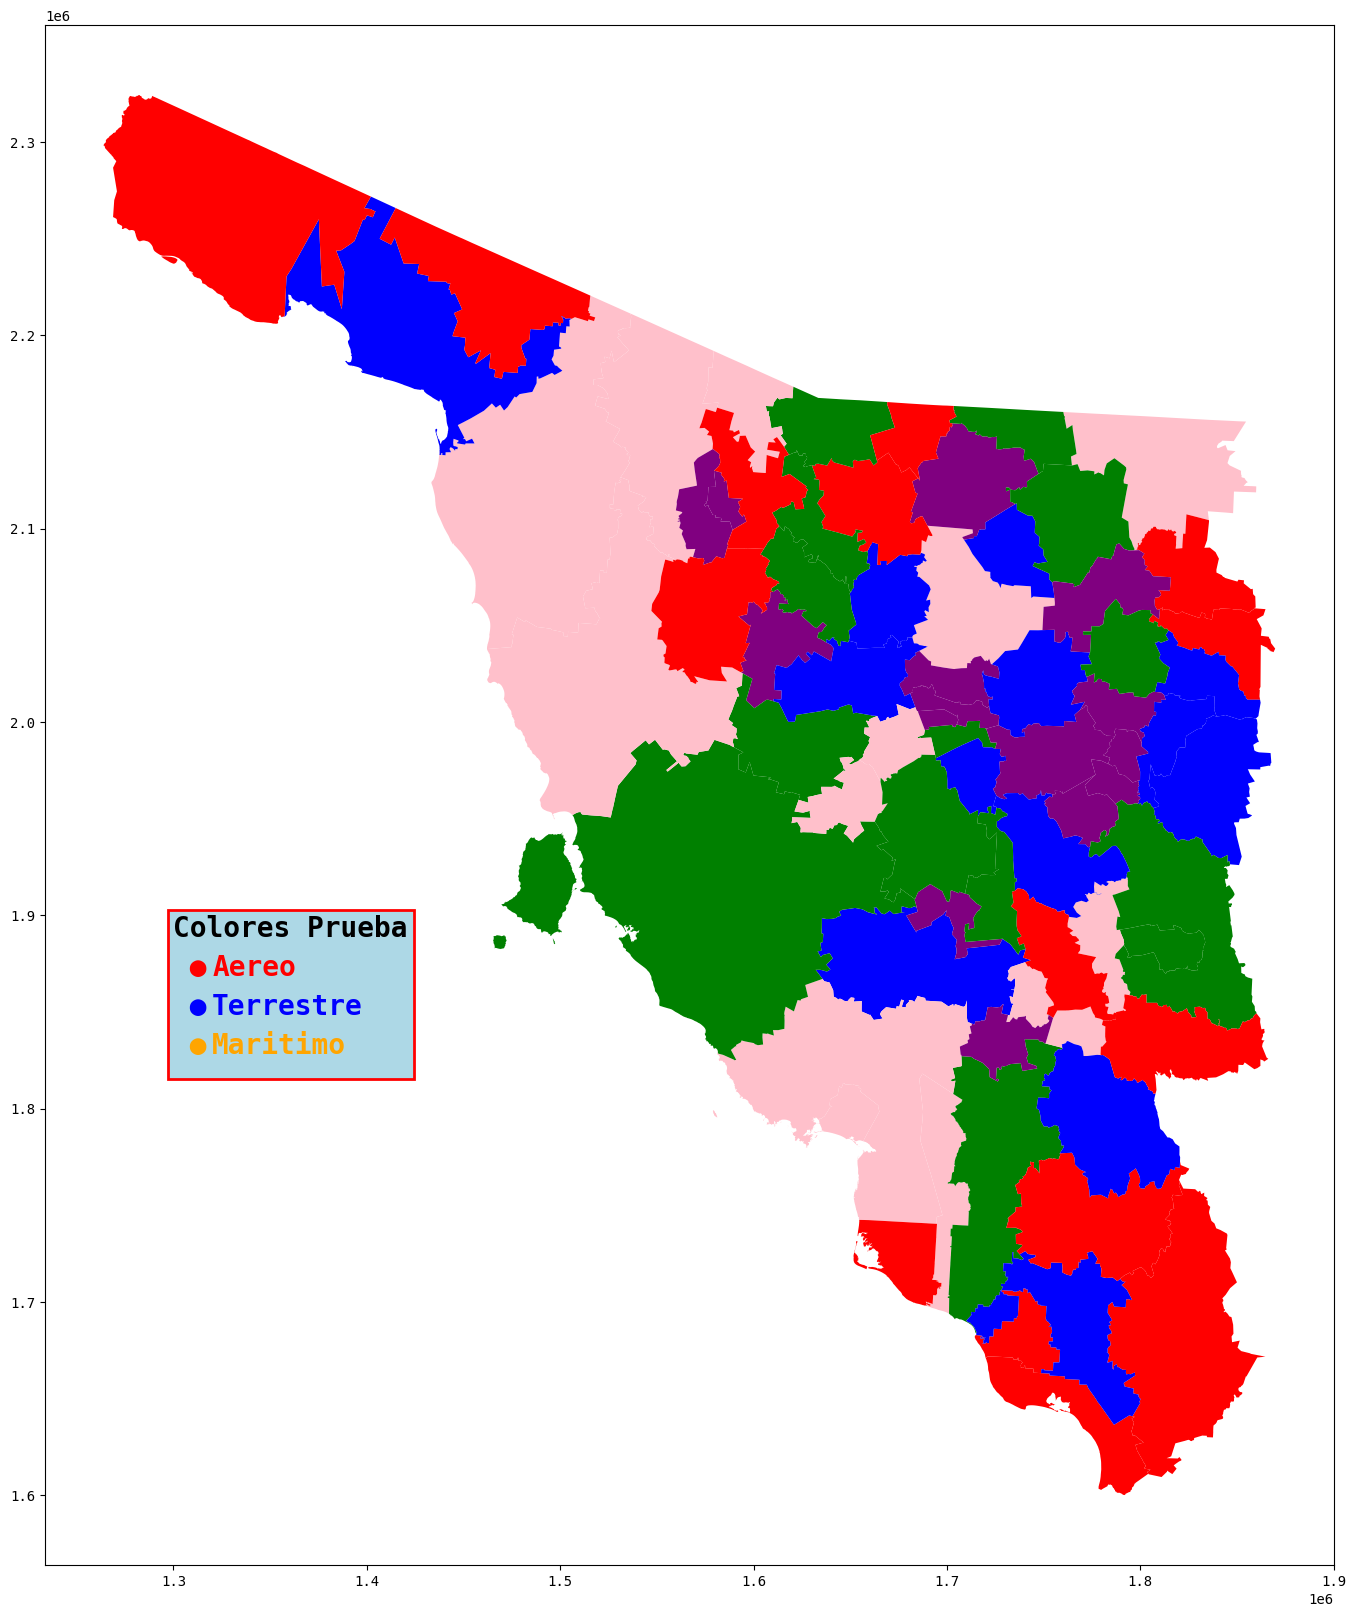

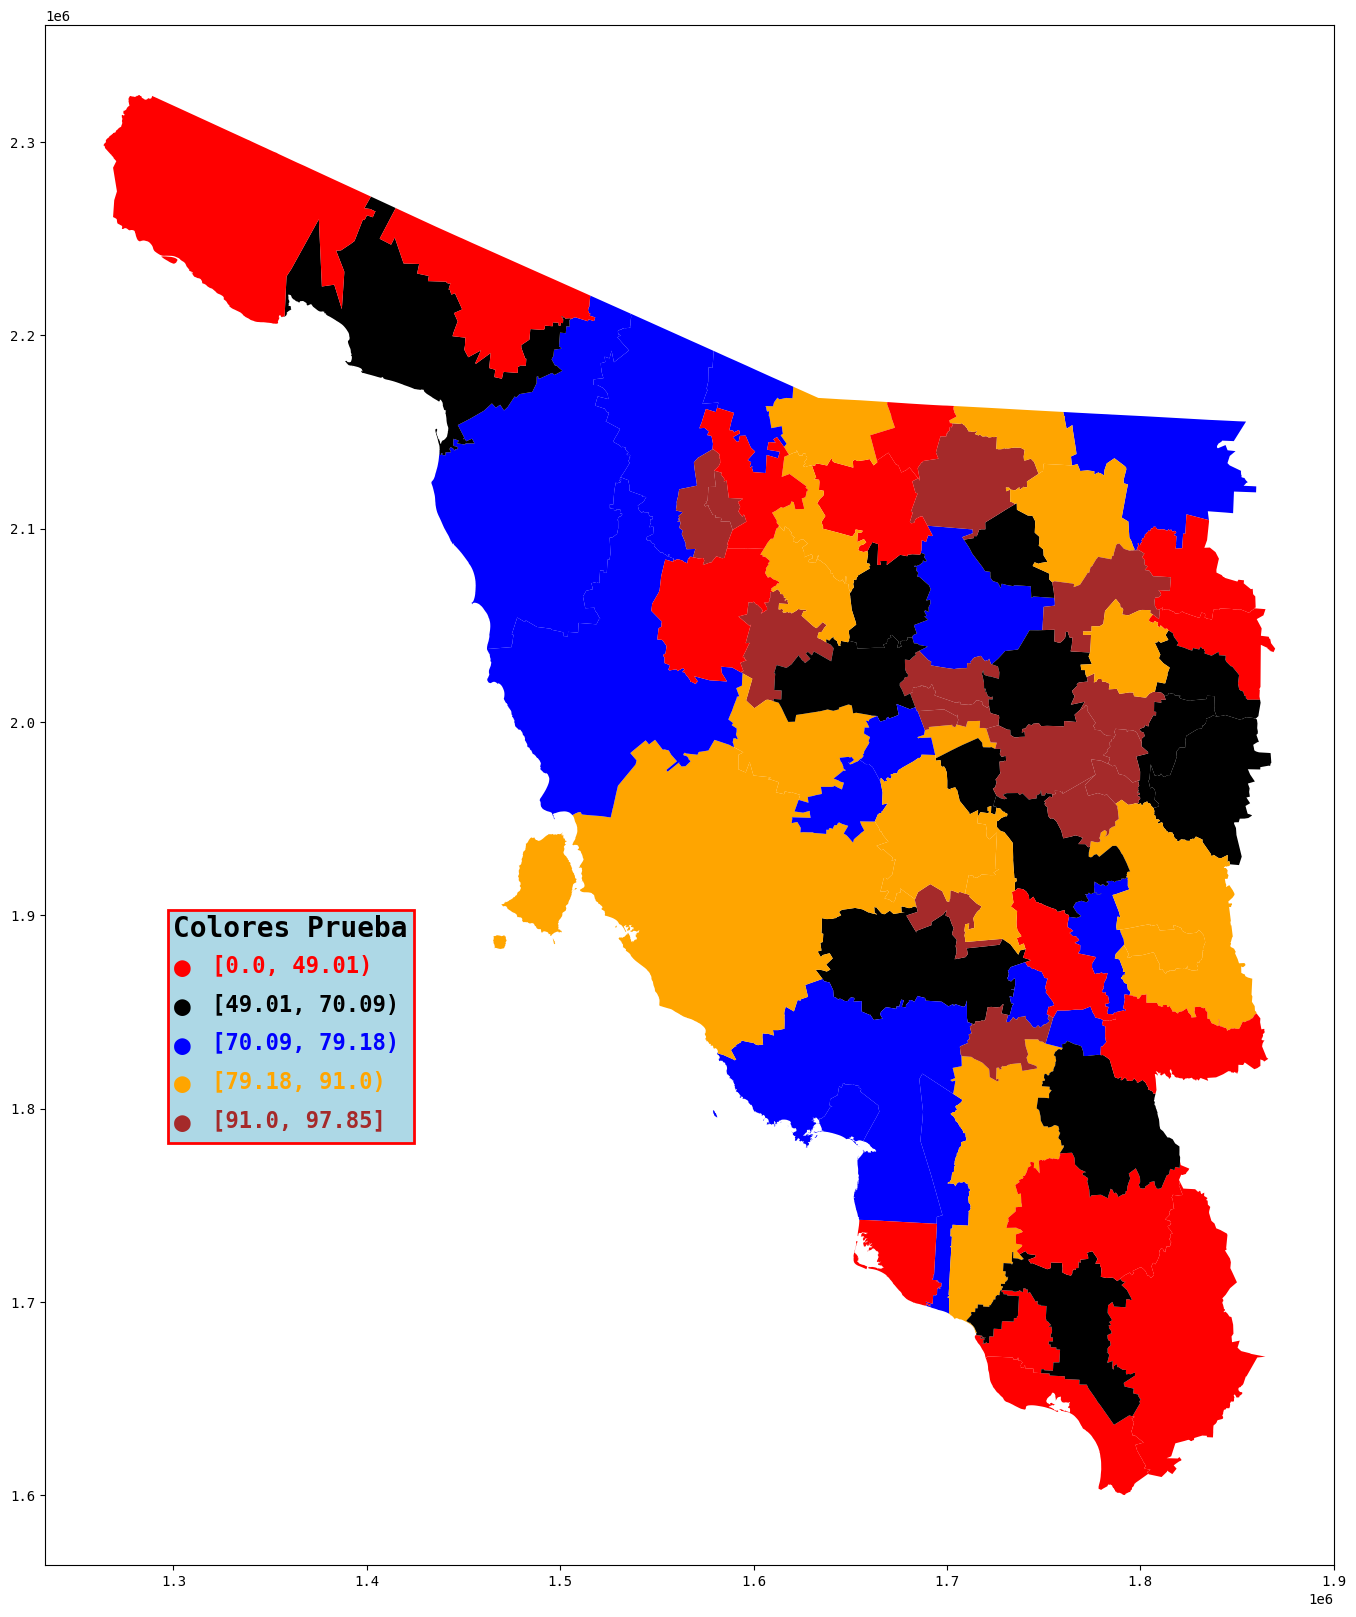

In [14]:

color_data = mapcol.color_by_data(agua_sonora, '1', 'quantiles', colors)

temp_map, tax =plt.subplots(figsize = (20,20))
agua_sonora.plot(collll, color = color_data, ax = tax)

def prop_to_coords(p_prop, ax):
    map_xlim = ax.get_xlim()
    map_ylim = ax.get_ylim()
    p_x = map_xlim[0] * (1 - p_prop[0]) + map_xlim[1] * p_prop[0]
    p_y = map_ylim[0] * (1 - p_prop[1]) + map_ylim[1] * p_prop[1]
    return tuple([p_x, p_y])


test = {
        # 'loc' : 'lower left',
        'title': 'Proporcion de Población',
        'title_fontsize': 16,
        'bbox_to_anchor' : (0.6,0.2),
        'markerscale' : 1.2,
        'fontsize' : 14,
        'interval': True
        }

leg_example = {
    'title': [20, 'black', 'bold','Colores Prueba'],
    'red': [20, ' ●', 20, 'bold','Aereo'],
    'blue': [20, ' ●', 20, 'bold','Terrestre'],
    'orange': [20, ' ●', 20, 'bold', 'Maritimo'],

}


addon.leg_text([1.3e6,1.9e6], leg_example, tax, sep_x = 2e4)


def legend_content(labels, config):
    lks = list(config.keys())
    for k in range(1, len(lks)): 
        config[lks[k]][-1] = labels[k - 1]
    return config

def legend_by_data(mapa, col, ax, **kwargs):
    legend_block = kwargs.get('legend_format',{
    'title': [20, 'black', 'bold', 'Colores Prueba'],
    0: [20, '●', 16, 'bold','Aereo'],
    1: [20, '●', 16, 'bold','Terrestre'],
    2: [20, '●', 16, 'bold', 'Maritimo'],
    3: [20, '●', 16, 'bold', 'Maritimo_Terrestre'],
    4: [20, '●', 16, 'bold', 'Maritimo_Aereo'],
    }
    )
    data_properties = kwargs.get('data', {
        'scheme': 'quantiles',
        'colors': {0:'red',
                   1:'black',
                   2:'blue',
                   3:'orange',
                   4:'brown'},
        'interval': True
    })
    leg_colorf = {'title': legend_block['title']}
    for k in range(len(data_properties['colors'])):
        leg_colorf[data_properties['colors'][k]] = legend_block[k]
    color_data = mapcol.color_by_data(mapa, col,
                                      data_properties['scheme'],
                                      data_properties['colors'])
    leg_labels =[]
    if data_properties['interval']:
        partition = addon.scheme_to_interval(mapa, col, data_properties['scheme'])
        for k in range(len(partition) - 1):
            if k == len(partition) - 2:
                leg_labels.append(f'[{partition[k]}, {partition[k + 1]}]')
            else:
                leg_labels.append(f'[{partition[k]}, {partition[k + 1]})')
    leg_colorf = legend_content(leg_labels, leg_colorf)
    
    mapa.plot(color = color_data, ax = ax)
    addon.leg_text([1.3e6,1.9e6], leg_colorf, ax, sep_x = 2e4)

fig1, axs = plt.subplots(figsize = (20,20))
legend_by_data(agua_sonora, '1', axs)



In [9]:

def leg_text(pos, leg: dict, ax, **kwargs):
    sx = kwargs.get('sep_x', 1e4)
    sy = kwargs.get('sep_y', 2e4)
    g = 0
    labels = [len(k[-1]) for k in leg.values()]
    lab_max = np.array(labels).max()
    leg_list = list(leg.values())
    max_text = leg_list[labels.index(lab_max)][-1]
    ax.annotate(f'{max_text}\n'*4 + f'{max_text}', xy = pos, xytext=pos, ha = 'left',va = 'top',
                bbox = {
        'fc' : 'lightblue'
    }, fontsize = 20, color = 'lightblue')
    for color, lt in leg.items():
        if color == 'title':
            ax.annotate(lt[2], xy = pos, xytext = (pos[0], pos[1] - g * sy),
                        color = lt[1], fontsize = lt[0], ha = 'left', va = 'top')
            g = g + 1
        else:
            ax.annotate(lt[1], xy = pos, xytext = (pos[0], pos[1] - g * sy),
                        color = color, fontsize = lt[0], ha = 'left', va = 'top')
            ax.annotate(lt[3], xy = pos, xytext = (pos[0] + sx, pos[1]- g * sy),
                        color = color, fontsize = lt[2], ha = 'left', va = 'top')
            g = g + 1